In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
# Parameters
BATCH_SIZE = 32
SAMPLES_PER_BATCH = 1000

In [3]:
# Generate training and output data
x_train = tf.random.uniform(shape=[BATCH_SIZE*SAMPLES_PER_BATCH,], minval=-2.0 * np.pi, maxval=2.0 * np.pi)
y_train = tf.math.sin(x_train)

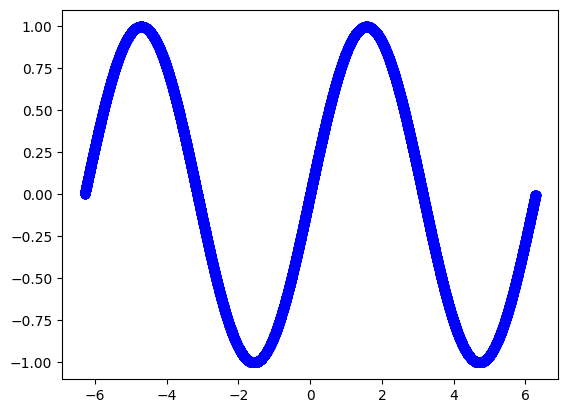

In [4]:
# Create visualization of the training data
plt.plot(x_train, y_train, 'bo')
plt.show()

In [5]:
# Create model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(16, activation='relu', input_shape=(1,)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1)
])

C:\Users\Lars Ivar Hatledal\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
# Compile model
model.compile(optimizer='adam',
              loss='mse')

In [7]:
# Train the model
model.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=20)

Epoch 1/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.2877
Epoch 2/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1001
Epoch 3/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0881
Epoch 4/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0786
Epoch 5/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0713
Epoch 6/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0712
Epoch 7/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0703
Epoch 8/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0696
Epoch 9/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0695
Epoch 10/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0691
Epoch 11/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0561
Epoch 12/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0217
Epoch 13/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0042
Epoch 14/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0018
Epoch 15/20
1000/1000 ━━━━━━━

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


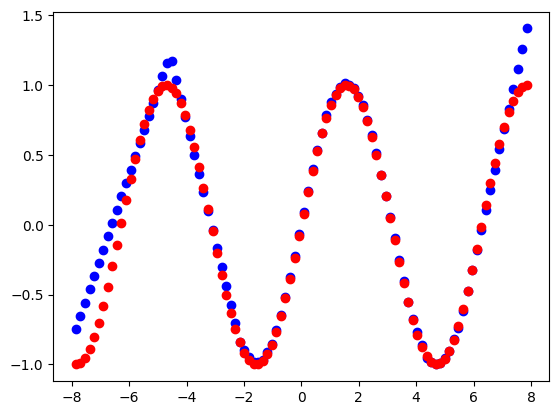

In [8]:
# Plot model predictions and reference
test_inputs = np.linspace(-2.5 * np.pi, 2.5 * np.pi, num=100)
test_outputs = model.predict(test_inputs)
reference = tf.math.sin(test_inputs)

plt.plot(test_inputs, test_outputs, 'bo')
plt.plot(test_inputs, reference, 'ro')
plt.show()

In [10]:
# Export model
model.save("stored-model.keras")

In [11]:
# Load in the saved model
loaded_model = tf.keras.models.load_model("stored-model.keras")

In [12]:
# Make prediction with model loaded from file
loaded_test_input = -1.0

print("Predicted: from file:")
print(loaded_model.predict(np.array([loaded_test_input]), verbose=0)[0][0])
print("Predicted: from memory:")
print(model.predict(np.array([loaded_test_input]), verbose=0)[0][0])
print("Reference:")
print(np.sin([loaded_test_input])[0])

Predicted: from file:
-0.8332214
Predicted: from memory:
-0.8332214
Reference:
-0.8414709848078965
